In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [14]:

#mport sys,os
#sys.path.append(os.path.abspath(os.path.join(os.path.dirname('/..scripts'))))


In [15]:
file_path='../data/data_source.csv'

os.chdir('..')
import data_preparation as pre
from scripts.data_preprocessing import load_data

In [16]:
from scripts.data_preprocessing import load_data,preprocess_data,check_missing_values,select_columns

In [17]:
from scripts.data_preparation import select_columns,load_data

In [18]:
from scripts.handle_duplicates import remove_duplicates

In [19]:
from scripts.data_analysis import top_handsets,top_handsets_per_manufacturer,top_manufacturers

In [20]:
from scripts.utils import load_data,check_missing_values

In [21]:
file_path='../data/data_source.csv'

In [22]:
df=pd.read_csv('../data/data_source.csv')
print(df.head(15))

       Bearer Id            Start  Start ms              End  End ms  \
0   1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1   1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2   1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3   1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4   1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
5   1.311448e+19  4/12/2019 21:37     439.0   4/25/2019 8:08   553.0   
6   1.311448e+19   4/13/2019 8:41     612.0   4/25/2019 8:16   168.0   
7   1.304243e+19   4/14/2019 2:11     592.0   4/25/2019 2:26   512.0   
8   1.311448e+19  4/14/2019 12:48     121.0  4/25/2019 10:22   960.0   
9   1.304243e+19   4/15/2019 0:32       0.0   4/25/2019 0:40   284.0   
10  7.277826e+18  4/15/2019 10:30      90.0   4/25/2019 6:14   775.0   
11  1.311448e+19  4/15/2019 11:33     626.0  4/25/2019 18:44   542.0   
12  1.311448e+19  4/15/2019 12:20     729.0   4/25/2019 8:40   8

In [23]:
import pandas as pd

# Step 1: Load your data into a DataFrame with IMEI as string
df=pd.read_csv('../data/data_source.csv',dtype={'IMEI':str})

# Step 2: Extract the IMEI column
imei_column = df['IMEI']

# Step 3: Get unique IMEI numbers
unique_handsets = imei_column.unique()

# Step 4: Print each unique IMEI number separately
for imei in unique_handsets:
    print(imei)


35521209507511
35794009006359
35281510359387
35356610164913
35407009745539
35298410295700
86762704322800
86546404964017
35562409696153
35573109931422
35346810795030
86009102759374
35665009621983
35573009195619
35405309375090
35405309549461
35405309844464
35525709450297
86540802106829
35379908844166
35463909491032
35887508325727
86908403076780
35364409761878
35765408043240
35405309404336
35910809669038
35765408781973
35620409238922
35182310828869
35182310425574
35639708345183
35887508210678
35405309547408
86164003002733
86778702571233
35798809873363
35405309170584
35766108076715
86376903225730
35586610375241
35405309150628
86376903253535
86621903439880
35948508284637
35407509405316
35306809518646
35608809386234
35191010573675
35613509259669
35260109825836
35155509429516
35482709275612
35405309549382
35405309422106
35680809309589
86376903425742
35332510319913
35642107853610
35798809982792
35757509422389
35281410394266
35407509446503
35380808922628
35615309219873
35384608625929
3591080948

In [24]:
imei_counts=imei_column.value_counts()


In [25]:
top_10_handsets=imei_counts.head(10)

In [26]:
print(top_10_handsets)

IMEI
35182310355840    18
35281410321760    17
35746309624511    17
86948003612677    16
35405309346774    15
86724003047878    15
35643708181534    13
35281410289584    12
35586610643189    12
35171510435028    12
Name: count, dtype: int64


In [27]:
top_5_handsets=imei_counts.head(5)

In [28]:
print(top_5_handsets)

IMEI
35182310355840    18
35281410321760    17
35746309624511    17
86948003612677    16
35405309346774    15
Name: count, dtype: int64


In [29]:
imei_counts=imei_column.value_counts()

In [30]:
top_3_handsets_manufacturer=imei_counts.head(3)

In [31]:
print(top_3_handsets_manufacturer)

IMEI
35182310355840    18
35281410321760    17
35746309624511    17
Name: count, dtype: int64


In [32]:
print(top_5_handsets/top_3_handsets_manufacturer)

IMEI
35182310355840    1.0
35281410321760    1.0
35405309346774    NaN
35746309624511    1.0
86948003612677    NaN
Name: count, dtype: float64


In [33]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,122172.000000,122189.000000,150000.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,109.795706,17.662883,13300.045927,1770.428647,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,619.782739,84.793524,23971.878541,4625.355500,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,0.000000,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,32.000000,2.000000,43.000000,47.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,45.000000,5.000000,63.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,70.000000,15.000000,19710.750000,1120.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,96923.000000,7120.000000,378160.000000,58613.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [34]:
duplicate=df.duplicated()
print(duplicate)

0         False
1         False
2         False
3         False
4         False
          ...  
149996    False
149997    False
149998    False
149999    False
150000    False
Length: 150001, dtype: bool


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  object 
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [36]:
number_of_xdr_session=df.value_counts
print(number_of_xdr_session)

<bound method DataFrame.value_counts of            Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN              NaN       NaN              NaN     NaN   

        Dur. (ms)          IMSI  MSISDN/Number 

In [37]:
aggregated_data = df.groupby('IMSI').agg({
    'IMSI': 'count',
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).rename(columns={
    'IMSI': 'number_of_sessions',
    'Dur. (ms)': 'total_session_duration',
    'Total DL (Bytes)': 'total_download_data',
    'Total UL (Bytes)': 'total_upload_data',
    'Youtube DL (Bytes)': 'total_youtube_dl',
    'Youtube UL (Bytes)': 'total_youtube_ul',
    'Netflix DL (Bytes)': 'total_netflix_dl',
    'Netflix UL (Bytes)': 'total_netflix_ul',
    'Gaming DL (Bytes)': 'total_gaming_dl',
    'Gaming UL (Bytes)': 'total_gaming_ul',
    'Other DL (Bytes)': 'total_other_dl',
    'Other UL (Bytes)': 'total_other_ul'
})

# Calculate total data volume
aggregated_data['total_data_volume'] = aggregated_data['total_download_data'] + aggregated_data['total_upload_data']

# Reset the index to make it easier to read
aggregated_data = aggregated_data.reset_index()

# Print the aggregated data
print(aggregated_data.head())


           IMSI  number_of_sessions  total_session_duration  \
0  2.040471e+14                   1                869844.0   
1  2.040808e+14                   1                877385.0   
2  2.082001e+14                   1                 86019.0   
3  2.082001e+14                   1                 86254.0   
4  2.082001e+14                   2                573923.0   

   total_download_data  total_upload_data  total_youtube_dl  total_youtube_ul  \
0           78697597.0         60456049.0        18980320.0        21960390.0   
1          194828056.0         37295915.0         9839889.0         2120016.0   
2           31376981.0         53794658.0         5556563.0        14325876.0   
3          392918313.0         33583272.0        22414714.0         3242918.0   
4          961767023.0         71325004.0         4046597.0         9793604.0   

   total_netflix_dl  total_netflix_ul  total_gaming_dl  total_gaming_ul  \
0        21621336.0         7224894.0       28092282.0     

In [38]:
df.isnull

<bound method DataFrame.isnull of            Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN              NaN       NaN              NaN     NaN   

        Dur. (ms)          IMSI  MSISDN/Number       

In [39]:
# Example for categorical columns (replace 'Last Location Name' with any actual categorical column)
df['Last Location Name'].fillna('Unknown', inplace=True)


C:\Users\h\AppData\Local\Temp\ipykernel_13552\244573273.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Last Location Name'].fillna('Unknown', inplace=True)


In [40]:
# Assuming there are join_date and monthly_spending columns, replace with actual columns in your dataset if different
df['join_date'] = pd.to_datetime(df['Start'])  # Example of a join date column

# Create tenure (in days)
df['tenure'] = pd.to_datetime(df['join_date']).apply(lambda x: (pd.to_datetime('today') - x).days)

# Categorize customers based on spending
# Example column names, replace 'monthly_spending' with actual column
df['spending_category'] = pd.cut(df['Total DL (Bytes)'], bins=[0, 10**6, 10**7, 10**8, 10**9], labels=['Low', 'Medium', 'High', 'Very High'])

# Segment customers based on usage (e.g., heavy data users)
df['heavy_data_user'] = df['Total DL (Bytes)'] > df['Total DL (Bytes)'].quantile(0.75)


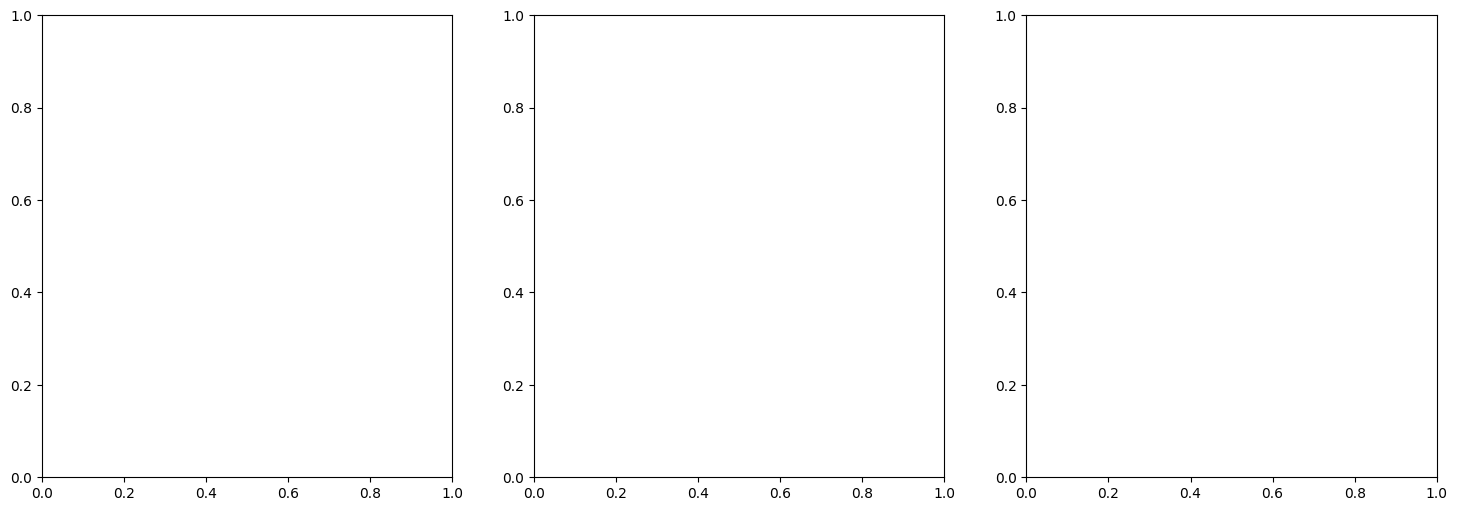

In [41]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


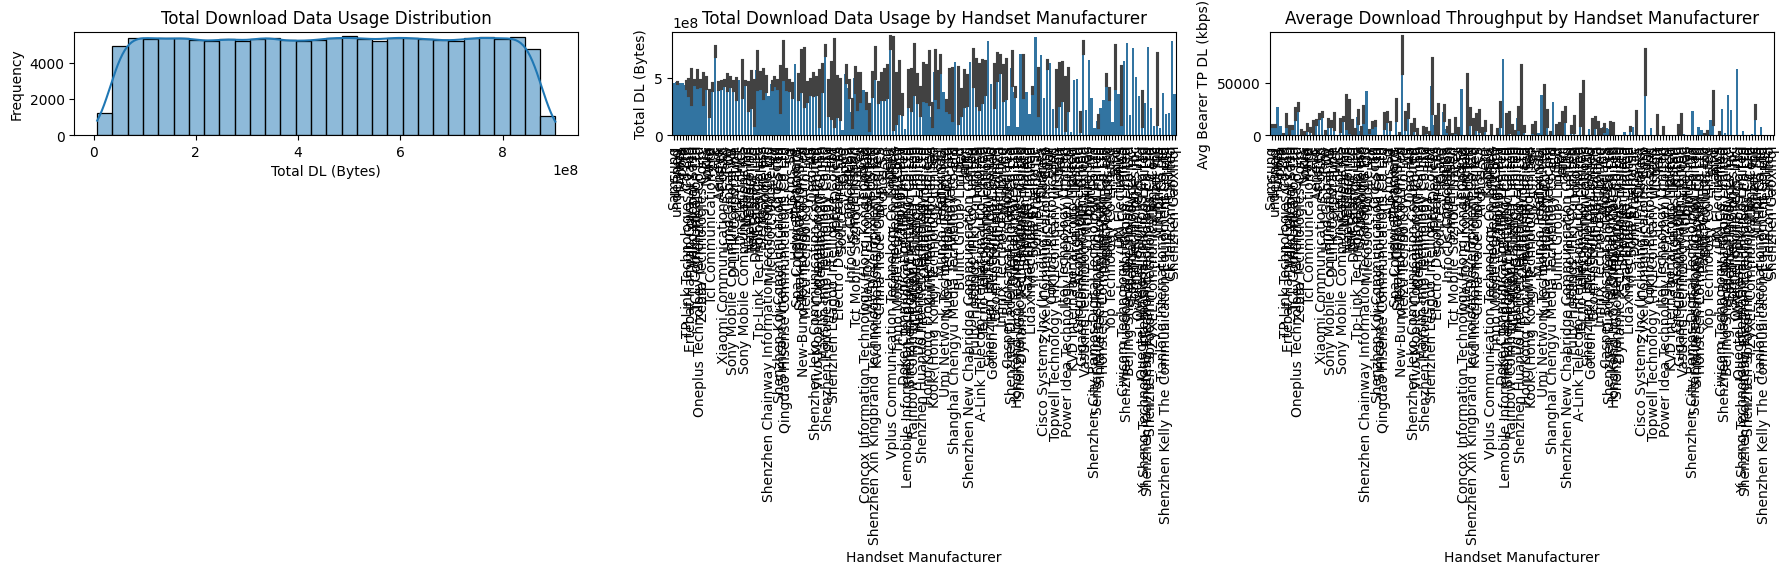

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is already loaded with the relevant data
# Example: df = pd.read_csv('path_to_your_dataset.csv')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Distribution of Total Download Data Usage
sns.histplot(df['Total DL (Bytes)'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Total Download Data Usage Distribution')
axes[0].set_xlabel('Total DL (Bytes)')
axes[0].set_ylabel('Frequency')

# Plot 2: Total Download Data Usage by Handset Manufacturer (example usage)
sns.barplot(data=df, x='Handset Manufacturer', y='Total DL (Bytes)', ax=axes[1])
axes[1].set_title('Total Download Data Usage by Handset Manufacturer')
axes[1].set_xlabel('Handset Manufacturer')
axes[1].set_ylabel('Total DL (Bytes)')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels if there are many manufacturers

# Plot 3: Average Download Throughput by Handset Manufacturer
sns.barplot(data=df, x='Handset Manufacturer', y='Avg Bearer TP DL (kbps)', ax=axes[2])
axes[2].set_title('Average Download Throughput by Handset Manufacturer')
axes[2].set_xlabel('Handset Manufacturer')
axes[2].set_ylabel('Avg Bearer TP DL (kbps)')
axes[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels if there are many manufacturers

# Display the plots
plt.tight_layout()
plt.show()


In [43]:
# Group by spending categories and calculate mean and count
spending_summary = df.groupby('spending_category')['Total DL (Bytes)'].agg(['mean', 'count'])

# Display the summary
print(spending_summary)


                           mean   count
spending_category                      
Low                         NaN       0
Medium             9.127180e+06       9
High               6.577865e+07   12114
Very High          4.888385e+08  137877


C:\Users\h\AppData\Local\Temp\ipykernel_13552\967301757.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_summary = df.groupby('spending_category')['Total DL (Bytes)'].agg(['mean', 'count'])


C:\Users\h\AppData\Local\Temp\ipykernel_13552\736914084.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='spending_category', palette='Set2')


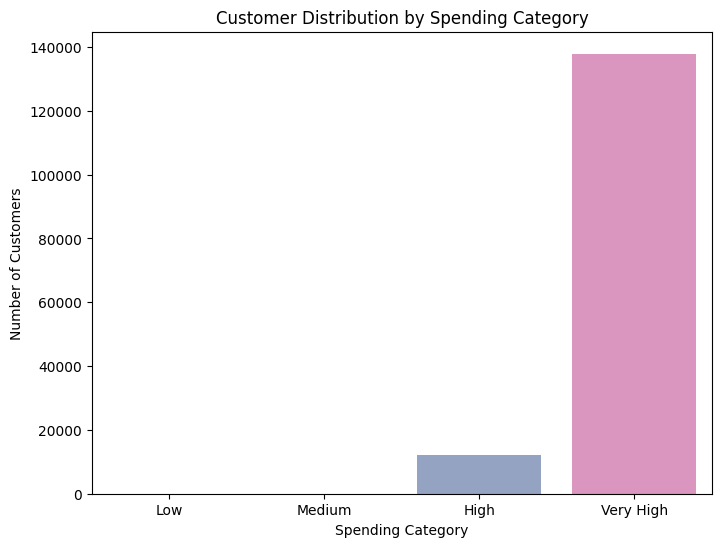

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='spending_category', palette='Set2')
plt.title('Customer Distribution by Spending Category')
plt.xlabel('Spending Category')
plt.ylabel('Number of Customers')
plt.show()


In [45]:
# Group by heavy data user status and calculate mean and count
heavy_data_summary = df.groupby('heavy_data_user')['Total DL (Bytes)'].agg(['mean', 'count'])

# Display the summary
print(heavy_data_summary)


                         mean   count
heavy_data_user                      
False            3.490079e+08  112500
True             7.715501e+08   37500


In [46]:
# Identifying top 10 handsets used by customers
top_10_handsets = df['Handset Type'].value_counts().head(10)

# Identifying top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)

# Identifying the top 5 handsets per top 3 handset manufacturers
top_3_manufacturers_list = top_3_manufacturers.index.tolist()
top_handsets_by_manufacturer = {
    manufacturer: df[df['Handset Manufacturer'] == manufacturer]['Handset Type']
    .value_counts()
    .head(5)
    for manufacturer in top_3_manufacturers_list
}

top_10_handsets, top_3_manufacturers, top_handsets_by_manufacturer


(Handset Type
 Huawei B528S-23A                19752
 Apple iPhone 6S (A1688)          9419
 Apple iPhone 6 (A1586)           9023
 undefined                        8987
 Apple iPhone 7 (A1778)           6326
 Apple iPhone Se (A1723)          5187
 Apple iPhone 8 (A1905)           4993
 Apple iPhone Xr (A2105)          4568
 Samsung Galaxy S8 (Sm-G950F)     4520
 Apple iPhone X (A1901)           3813
 Name: count, dtype: int64,
 Handset Manufacturer
 Apple      59565
 Samsung    40839
 Huawei     34423
 Name: count, dtype: int64,
 {'Apple': Handset Type
  Apple iPhone 6S (A1688)    9419
  Apple iPhone 6 (A1586)     9023
  Apple iPhone 7 (A1778)     6326
  Apple iPhone Se (A1723)    5187
  Apple iPhone 8 (A1905)     4993
  Name: count, dtype: int64,
  'Samsung': Handset Type
  Samsung Galaxy S8 (Sm-G950F)    4520
  Samsung Galaxy A5 Sm-A520F      3724
  Samsung Galaxy J5 (Sm-J530)     3696
  Samsung Galaxy J3 (Sm-J330)     3484
  Samsung Galaxy S7 (Sm-G930X)    3199
  Name: count, dtype

In [47]:
# Aggregating per user data

# Columns to aggregate
aggregation_columns = [
    'Bearer Id',  # Count sessions per user
    'Session_Duration_sec',  # Sum session duration
    'Dur. (ms)',  # Sum session duration in ms for verification
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Streaming DL (Bytes)', 'Streaming UL (Bytes)',
    'Total DL (Bytes)', 'Total UL (Bytes)'
]

# Aggregating by 'IMSI' (user identifier)
user_aggregated_data = (
    df.groupby('IMSI', as_index=False)
    .agg({
        'Bearer Id': 'count',  # Number of sessions per user
        'Dur. (ms)': 'sum',  # Total session duration in ms
        'Social Media DL (Bytes)': 'sum',
        'Social Media UL (Bytes)': 'sum',
        'Gaming DL (Bytes)': 'sum',
        'Gaming UL (Bytes)': 'sum',
        'Total DL (Bytes)': 'sum',
        'Total UL (Bytes)': 'sum'
    })
)

# Adding a column for total data volume
user_aggregated_data['Total Data Volume (Bytes)'] = (
    user_aggregated_data['Total DL (Bytes)'] + user_aggregated_data['Total UL (Bytes)']
)

user_aggregated_data.head()  # Display the first few rows of the aggregated data


,IMSI,Bearer Id,Dur. (ms),Social Media DL (Bytes),Social Media UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total DL (Bytes),Total UL (Bytes),Total Data Volume (Bytes)
0,2.040471e+14,1,869844.0,1500145.0,45943.0,28092282.0,14977978.0,78697597.0,60456049.0,1.391536e+08
1,2.040808e+14,1,877385.0,668596.0,46628.0,164563605.0,13485133.0,194828056.0,37295915.0,2.321240e+08
2,2.082001e+14,1,86019.0,3073697.0,49084.0,3760934.0,5363582.0,31376981.0,53794658.0,8.517164e+07
3,2.082001e+14,1,86254.0,2542767.0,34337.0,343946503.0,159394.0,392918313.0,33583272.0,4.265016e+08
4,2.082001e+14,2,573923.0,3326811.0,99905.0,910301321.0,7383445.0,961767023.0,71325004.0,1.033092e+09


In [49]:
dispersion_params = df.describe()
print(dispersion_params)


          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.490100e+05  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744050e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324302e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   
std    2.893173e+18     288.611834     288.097653  8.103762e+04  2.148809e+10   

       MSISDN/Number  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05    122172.000000    122189.000000   
mean    4.188282e+10       109.795706        17.662883   
min     3.360100e+10         0.000000         0.000000   
25%     3.365130e+10        32.000000 